<a href="https://colab.research.google.com/github/Sandhiyaa0861/normaltask1/blob/main/terrorism_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns
import io

In [4]:
data = pd.read_csv("/content/globalterrorism.csv", encoding='latin-1')

<ipython-input-4-37d2c82f432d>:1: DtypeWarning: Columns (4,31,33,62,76,79,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/globalterrorism.csv", encoding='latin-1')


In [7]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [8]:
data.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
10930,1.980050e+11,1980,5,10,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
11466,1.980070e+11,1980,7,17,NaN,0,NaN,26,Bolivia,3,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
15638,1.982030e+11,1982,3,10,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
12135,1.980100e+11,1980,10,23,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
15461,1.982020e+11,1982,2,9,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
14360,1.981090e+11,1981,9,14,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
11741,1.980080e+11,1980,8,29,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
14128,1.981080e+11,1981,8,14,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7008,1.978110e+11,1978,11,17,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
100,1.970030e+11,1970,3,1,NaN,0,NaN,217,United States,1,...,This incident might be part of a multiple atta...,Committee on Government Operations United Stat...,"Anthony Ripley, ""Colorado Weighs Blast Control...","Nan Robertson, ""The First Lady Visits Projects...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN


In [9]:
print(data[10:21])
sliced_data=data[10:21]
print(sliced_data)


         eventid  iyear  imonth  iday approxdate  extended resolution  \
10  1.970010e+11   1970       1     1        NaN         0        NaN   
11  1.970010e+11   1970       1     6        NaN         0        NaN   
12  1.970010e+11   1970       1     8        NaN         0        NaN   
13  1.970010e+11   1970       1     9        NaN         0        NaN   
14  1.970010e+11   1970       1     9        NaN         0        NaN   
15  1.970010e+11   1970       1    10        NaN         0        NaN   
16  1.970010e+11   1970       1    11        NaN         0        NaN   
17  1.970010e+11   1970       1    12        NaN         0        NaN   
18  1.970010e+11   1970       1    12        NaN         0        NaN   
19  1.970010e+11   1970       1    13        NaN         0        NaN   
20  1.970010e+11   1970       1    14        NaN         0        NaN   

    country         country_txt  region  ...  \
10      217       United States       1  ...   
11      217       United St

In [10]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
specific_data=data[["imonth","country"]]
print(specific_data.head(10))

   imonth  country
0       7       58
1       0      130
2       1      160
3       1       78
4       1      101
5       1      217
6       1      218
7       1      217
8       1      217
9       1      217


In [12]:
data["country"].value_counts()

61     2551
603    2090
217    1712
185    1375
98     1226
       ... 
532       1
174       1
72        1
124       1
91        1
Name: country, Length: 129, dtype: int64

In [13]:
print(data.head())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [14]:
print(data.describe())

            eventid         iyear        imonth          iday      extended  \
count  1.891300e+04  18913.000000  18913.000000  18913.000000  18913.000000   
mean   1.978589e+11   1978.527204      6.196056     15.231851      0.019087   
std    3.409195e+08      3.412462      3.444869      8.960639      0.136836   
min    1.970000e+11   1970.000000      0.000000      0.000000      0.000000   
25%    1.977040e+11   1977.000000      3.000000      8.000000      0.000000   
50%    1.979100e+11   1979.000000      6.000000     15.000000      0.000000   
75%    1.981080e+11   1981.000000      9.000000     23.000000      0.000000   
max    1.983050e+11   1986.000000     12.000000     31.000000      1.000000   

            country        region      latitude     longitude   specificity  \
count  18913.000000  18913.000000  18163.000000  1.816300e+04  18912.000000   
mean     177.520383      5.413895     26.322046 -4.775917e+03      1.289499   
std      166.082535      3.356860     22.541727  6.

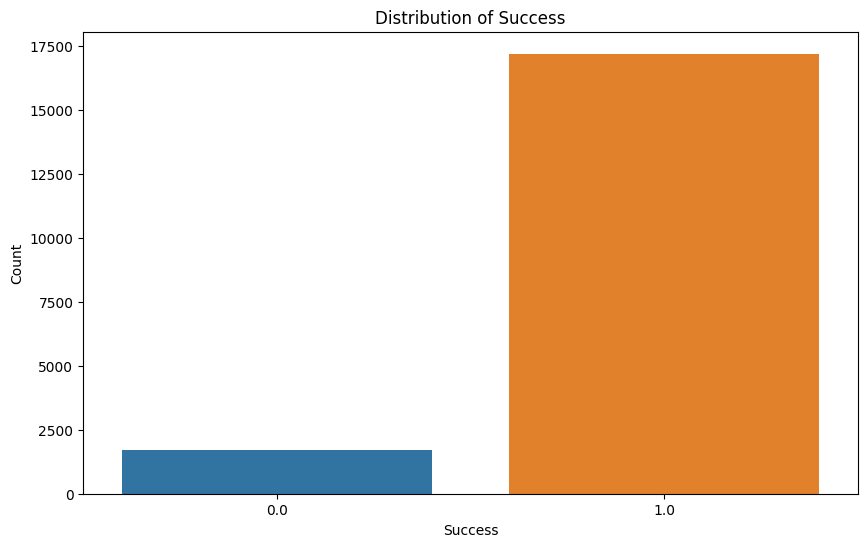

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='success', data=data)
plt.title('Distribution of Success')
plt.xlabel('Success')
plt.ylabel('Count')
plt.show()

In [16]:
print(data.isnull().sum())

eventid           0
iyear             0
imonth            0
iday              0
approxdate    18892
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       18176
Length: 135, dtype: int64


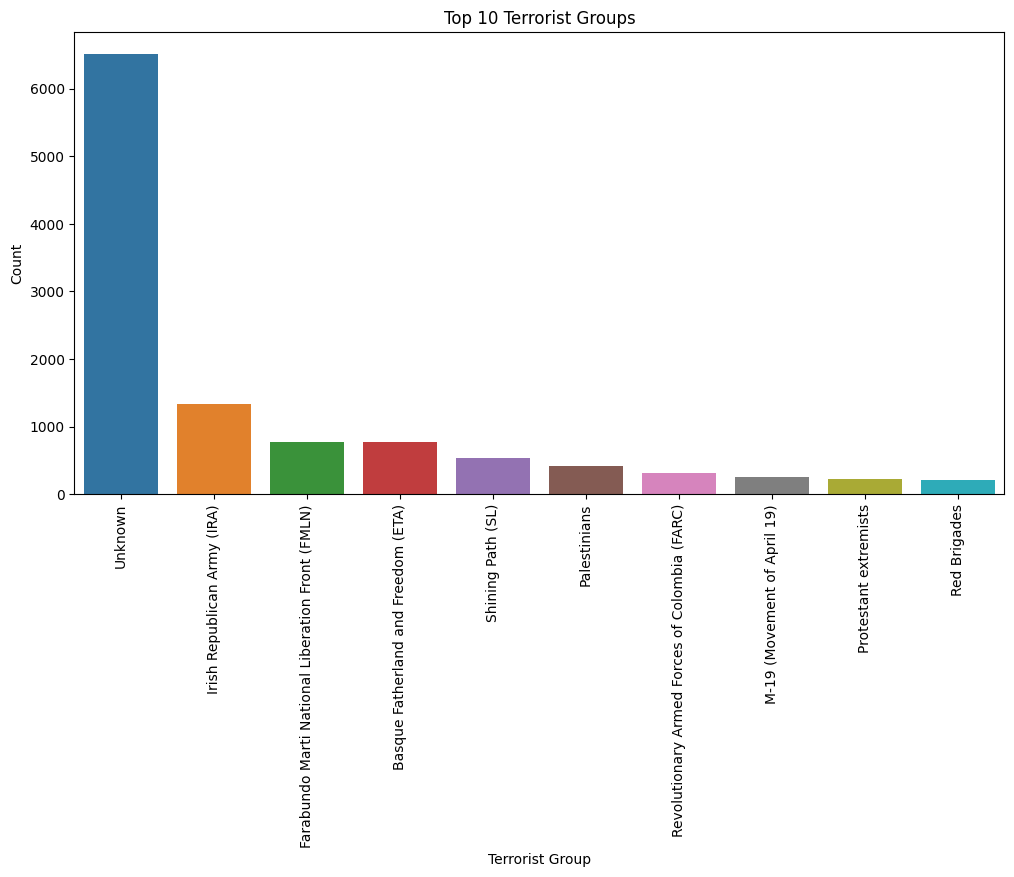

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='gname', data=data, order=data['gname'].value_counts().iloc[:10].index)
plt.title('Top 10 Terrorist Groups')
plt.xlabel('Terrorist Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


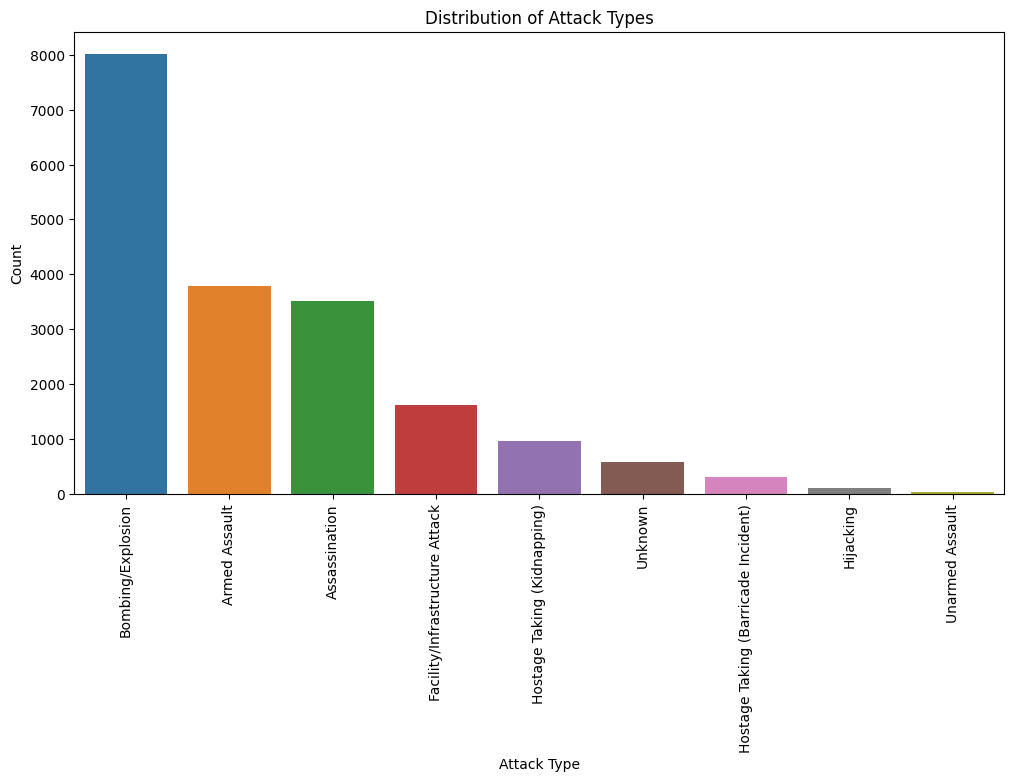

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='attacktype1_txt', data=data, order=data['attacktype1_txt'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [19]:

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))


<ipython-input-19-b7d46f1f84b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

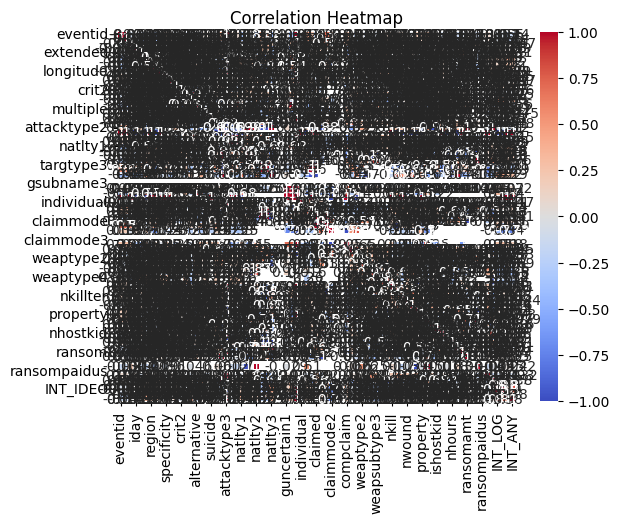

In [28]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

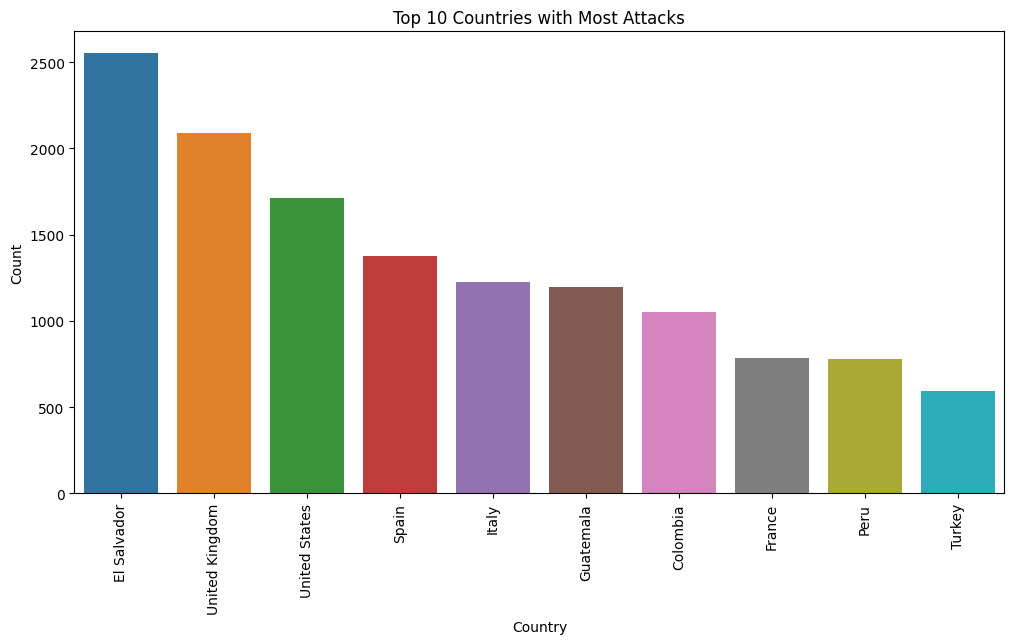

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='country_txt', data=data, order=data['country_txt'].value_counts().iloc[:10].index)
plt.title('Top 10 Countries with Most Attacks')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()